<>:73: SyntaxWarning: invalid escape sequence '\D'
<>:73: SyntaxWarning: invalid escape sequence '\D'
C:\Users\oka\AppData\Local\Temp\ipykernel_1632\3091909293.py:73: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Data.csv')


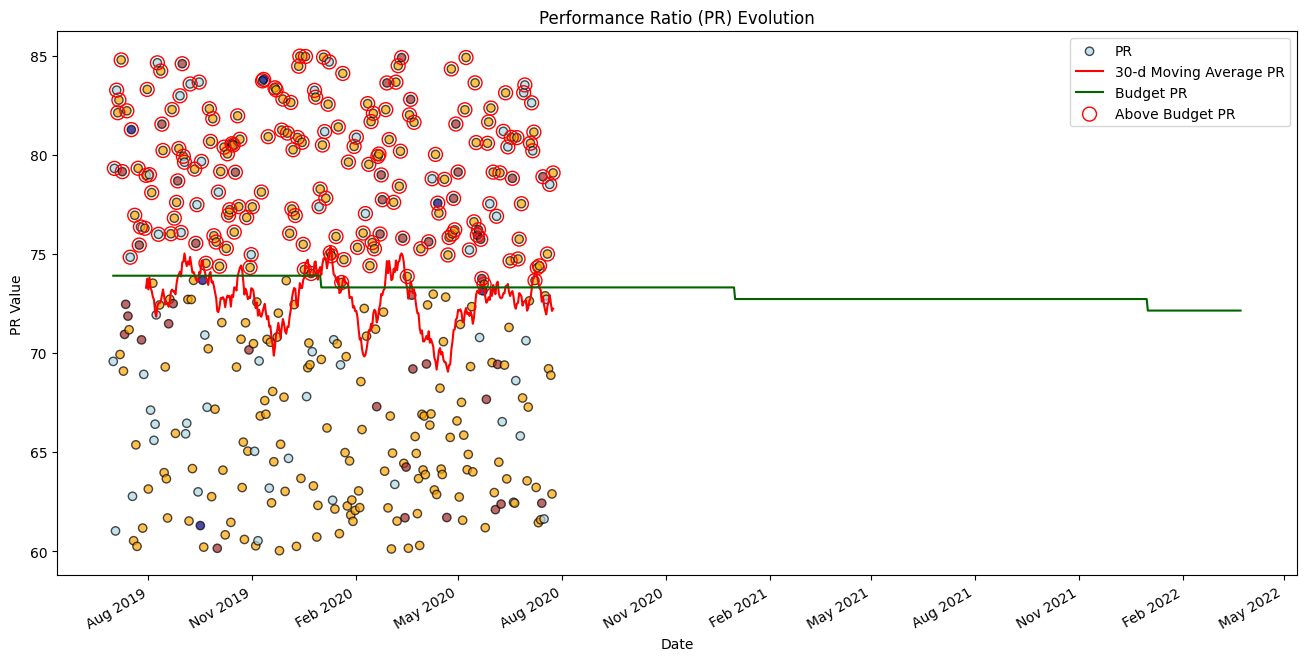

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

def generate_pr_graph(data):
    """
    Generates a performance ratio (PR) evolution graph.

    Args:
        data (pd.DataFrame): DataFrame containing columns: 'Date', 'PR', 'GHI'.

    Returns:
        None
    """

    # Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

    # Calculate 30-day moving average of PR
    data['PR_MA_30'] = data['PR'].rolling(window=30).mean()

    # Calculate dynamic budget line
    data['Year'] = data['Date'].dt.year
    start_year = data['Year'].min()
    budget_rate = 0.992  # 1 - 0.008
    data['Budget_PR'] = 73.9 * budget_rate ** (data['Year'] - start_year)

    # Define color mapping for scatter plot based on GHI values
    def color_for_ghi(ghi):
        if ghi < 2:
            return 'navy'
        elif 2 <= ghi < 4:
            return 'lightblue'
        elif 4 <= ghi < 6:
            return 'orange'
        else:
            return 'brown'

    data['Color'] = data['GHI'].apply(color_for_ghi)

    # Plotting the graph
    plt.figure(figsize=(16, 8))

    # Scatter plot for PR values colored by GHI
    plt.scatter(data['Date'], data['PR'], c=data['Color'], label='PR', alpha=0.7, edgecolor='k')

    # Plot 30-day moving average of PR
    plt.plot(data['Date'], data['PR_MA_30'], color='red', label='30-d Moving Average PR')

    # Plot dynamic budget line
    plt.plot(data['Date'], data['Budget_PR'], color='darkgreen', label='Budget PR')

    # Highlight PR values above budget
    above_budget = data[data['PR'] > data['Budget_PR']]
    plt.scatter(above_budget['Date'], above_budget['PR'], facecolors='none', edgecolor='red', s=100, label='Above Budget PR')

    # Format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()

   
    # Add title and labels
    plt.title('Performance Ratio (PR) Evolution')
    plt.xlabel('Date')
    plt.ylabel('PR Value')
    plt.legend()

    plt.show()

# Example usage with your data
data = pd.read_csv('D:\Data.csv')
generate_pr_graph(data)